10.0%. Run time:  39.01s. Est. time left: 00:00:05:51
20.0%. Run time:  78.07s. Est. time left: 00:00:05:12
30.0%. Run time: 114.07s. Est. time left: 00:00:04:26
40.0%. Run time: 147.31s. Est. time left: 00:00:03:40
50.0%. Run time: 181.00s. Est. time left: 00:00:03:00
60.0%. Run time: 214.66s. Est. time left: 00:00:02:23
70.0%. Run time: 247.70s. Est. time left: 00:00:01:46
80.0%. Run time: 281.45s. Est. time left: 00:00:01:10
90.0%. Run time: 315.18s. Est. time left: 00:00:00:35
100.0%. Run time: 348.65s. Est. time left: 00:00:00:00
Total run time: 349.19s


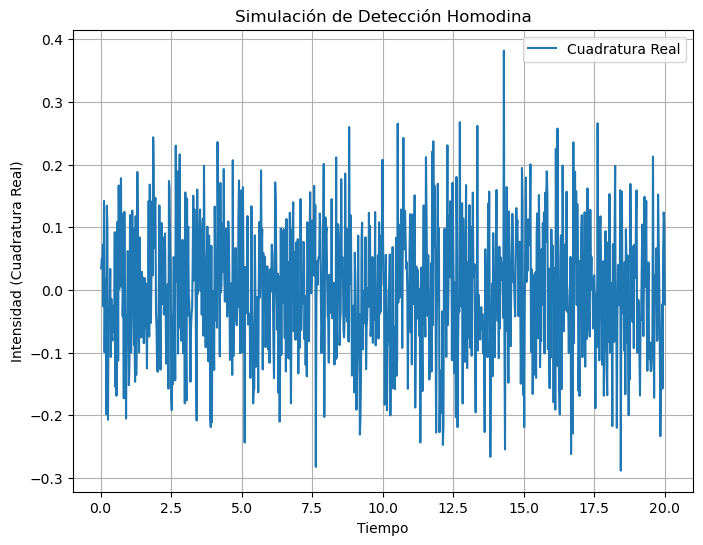

In [70]:
from qutip import basis, smesolve
import numpy as np
import matplotlib.pyplot as plt

# Definimos los estados base y excitado
NF = 2
Kg = basis(NF, 1)  # estado base
Ke = basis(NF, 0)  # estado excitado

# Estado inicial en |g>
psi0 = Kg

# Operadores de proyección
Agg = Kg * Kg.dag()  # |g><g|
Aee = Ke * Ke.dag()  # |e><e|
Aeg = Ke * Kg.dag()  # |e><g|
Age = Kg * Ke.dag()  # |g><e|

# Valores esperados (opciones de seguimiento del sistema)
expect_values = [Aee, Agg]  # Probabilidades de |e> y |g>

# Parámetros del sistema
Omega = 1  # Frecuencia de Rabi
g = 1  # Tasa de emisión espontánea

# Operador de colapso: emisión de |e> a |g>
Ceg = np.sqrt(g) * Age
collapse = [Ceg]

# Hamiltoniano: interacción entre |e> y |g>
H = 0.5 * Omega * (Aeg + Age)

# Tiempo de simulación
tlist = np.linspace(0, 20, 1000)

# Opciones para smesolve
options = {"store_measurement": True, "map": "parallel"}

# Simulación con detección homodina
result = smesolve(
    H,
    psi0,
    tlist,
    sc_ops=collapse,  # Operadores estocásticos
    e_ops=expect_values,  # Valores esperados
    ntraj=5000,# Número de trayectorias
    options=options,
)

# Revisamos las mediciones
measurements = result.measurement
sum_measurements = np.sum(measurements, axis=0)
average_measurement = sum_measurements / len(measurements)

tlist = tlist[1:]  # Eliminar el primer elemento de tlist

# Si la medición tiene una forma (100, 2), la primera columna es la cuadratura real
I_real = average_measurement[0]

# Graficamos la medición
plt.figure(figsize=(8, 6))
plt.plot(tlist, I_real, label="Cuadratura Real")
plt.title("Simulación de Detección Homodina")
plt.xlabel("Tiempo")
plt.ylabel("Intensidad (Cuadratura Real)")
plt.legend()
plt.grid(True)
plt.show()

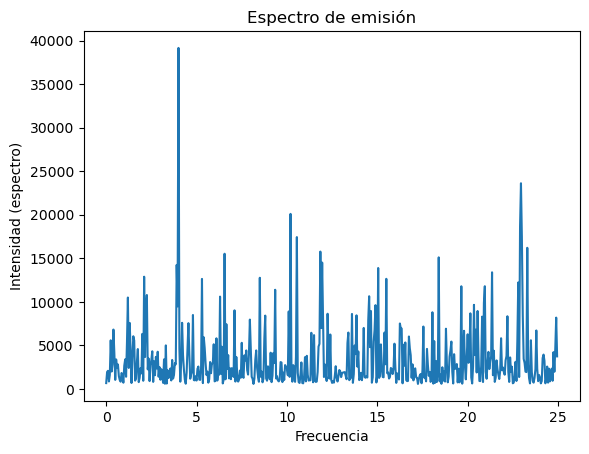

In [64]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Corrientes medidas (usamos las corrientes reales como ejemplo)
# Asegúrate de que `I_real` ya esté promediado sobre trayectorias si es necesario.
signal = I_real

# Tiempo entre puntos
dt = tlist[1] - tlist[0]

# Autocorrelación de la señal
correlation = np.correlate(signal, signal, mode='full')
correlation = correlation[correlation.size // 2:]  # Usamos solo la mitad positiva

# Transformada de Fourier de la autocorrelación
spectrum = np.abs(fft(correlation))**2

# Frecuencias asociadas
freqs = fftfreq(len(correlation), d=dt)

# Nos quedamos con las frecuencias positivas
positive_freqs = freqs[freqs >= 0]
positive_spectrum = spectrum[freqs >= 0]

# Graficamos el espectro
plt.figure()
plt.plot(positive_freqs, positive_spectrum)
plt.xlabel("Frecuencia")
plt.ylabel("Intensidad (espectro)")
plt.title("Espectro de emisión")
plt.show()


In [67]:
result.expect[0]

array([0.00000000e+00, 9.90049900e-05, 3.92045380e-04, 8.73213179e-04,
       1.53666675e-03, 2.37662967e-03, 3.38738529e-03, 4.56326462e-03,
       5.89871992e-03, 7.38833420e-03, 9.02654942e-03, 1.08083001e-02,
       1.27278761e-02, 1.47796143e-02, 1.69599317e-02, 1.92625705e-02,
       2.16848893e-02, 2.42172233e-02, 2.68599809e-02, 2.96041116e-02,
       3.24462699e-02, 3.53823119e-02, 3.84047500e-02, 4.15133040e-02,
       4.46937097e-02, 4.81328738e-02, 5.14723919e-02, 5.48799089e-02,
       5.83458398e-02, 6.18809728e-02, 6.54590095e-02, 6.90918424e-02,
       7.27770981e-02, 7.65281541e-02, 8.02942294e-02, 8.41262700e-02,
       8.79602422e-02, 9.18241298e-02, 9.57143008e-02, 9.96151574e-02,
       1.03519496e-01, 1.07512153e-01, 1.11523524e-01, 1.15538861e-01,
       1.19569492e-01, 1.23548657e-01, 1.27618824e-01, 1.31662762e-01,
       1.35650782e-01, 1.39689312e-01, 1.43793400e-01, 1.47727416e-01,
       1.51663689e-01, 1.55708223e-01, 1.59560973e-01, 1.63622076e-01,
      

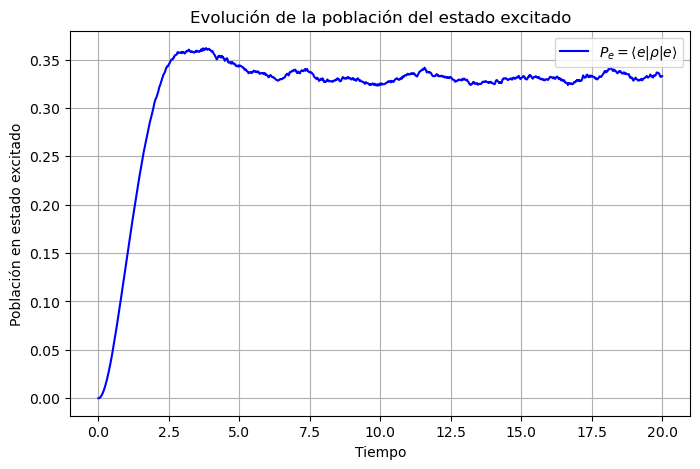

In [69]:
P_e = result.expect[0]
tlist = np.linspace(0, 20, 1000)
plt.figure(figsize=(8, 5))
plt.plot(tlist, P_e, label=r'$P_e = \langle e | \rho | e \rangle$', color='b')
plt.xlabel("Tiempo")
plt.ylabel("Población en estado excitado")
plt.title("Evolución de la población del estado excitado")
plt.legend()
plt.grid()
plt.show()